In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv

In [2]:
NBA_data = pd.read_csv('static/data/nba_games_stats.csv')

In [3]:
NBA_data.drop(['Unnamed: 0'], axis=1, inplace=True)

teams = NBA_data.Team.unique()
homeaway=[]
for i in range(len(NBA_data)):
    if NBA_data.Home.iloc[i] == 'Home':
        homeaway.append(1)
    else:
        homeaway.append(0)

NBA_data['Home_encoded'] = homeaway
NBA_data['X2PointShots'] = NBA_data['FieldGoals']-NBA_data['X3PointShots']
NBA_data['X2PointShotsAttempted'] = NBA_data['FieldGoalsAttempted']-NBA_data['X3PointShotsAttempted']
NBA_data['X2PointShotsPct'] = NBA_data['X2PointShots']/NBA_data['X2PointShotsAttempted']
NBA_data['eFG%'] = (NBA_data['X3PointShots']*1.5+NBA_data['X2PointShots'])/NBA_data['FieldGoalsAttempted']
NBA_data['Opp2PointShots'] = NBA_data['OppFieldGoals']-NBA_data['Opp3PointShots']
NBA_data['Opp2PointShotsAttempted'] = NBA_data['OppFieldGoalsAttempted']-NBA_data['Opp3PointShotsAttempted']
NBA_data['Opp2PointShotsPct'] = NBA_data['Opp2PointShots']/NBA_data['Opp2PointShotsAttempted']
NBA_data['OppeFG%'] = (NBA_data['Opp3PointShots']*1.5+NBA_data['Opp2PointShots'])/NBA_data['OppFieldGoalsAttempted']
NBA_data['DefRebounds'] = NBA_data['TotalRebounds']-NBA_data['OffRebounds']

In [4]:
MLR_nba = NBA_data[['Home_encoded','TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoalsPct', 'X3PointShots', 'X3PointShotsAttempted',
       'X3PointShotsPct', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrowsPct',
       'OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'TotalFouls', 'OppFieldGoals', 'OppFieldGoalsAttempted',
       'OppFieldGoalsPct', 'Opp3PointShots', 'Opp3PointShotsAttempted',
       'Opp3PointShotsPct', 'OppFreeThrows', 'OppFreeThrowsAttempted',
       'OppFreeThrowsPct', 'OppOffRebounds', 'OppTotalRebounds', 'OppAssists',
       'OppSteals', 'OppBlocks', 'OppTurnovers', 'OppTotalFouls','X2PointShots', 'X2PointShotsAttempted', 'X2PointShotsPct', 'eFG%',
       'Opp2PointShots', 'Opp2PointShotsAttempted', 'Opp2PointShotsPct',
       'OppeFG%', 'DefRebounds']]

In [5]:
NBA_data.columns

Index(['index', 'Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS',
       'TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoalsPct', 'X3PointShots', 'X3PointShotsAttempted',
       'X3PointShotsPct', 'FreeThrows', 'FreeThrowsAttempted', 'FreeThrowsPct',
       'OffRebounds', 'TotalRebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'TotalFouls', 'OppFieldGoals', 'OppFieldGoalsAttempted',
       'OppFieldGoalsPct', 'Opp3PointShots', 'Opp3PointShotsAttempted',
       'Opp3PointShotsPct', 'OppFreeThrows', 'OppFreeThrowsAttempted',
       'OppFreeThrowsPct', 'OppOffRebounds', 'OppTotalRebounds', 'OppAssists',
       'OppSteals', 'OppBlocks', 'OppTurnovers', 'OppTotalFouls', 'Logo',
       'Home_encoded', 'X2PointShots', 'X2PointShotsAttempted',
       'X2PointShotsPct', 'eFG%', 'Opp2PointShots', 'Opp2PointShotsAttempted',
       'Opp2PointShotsPct', 'OppeFG%', 'DefRebounds'],
      dtype='object')

In [6]:
MLR_nba.dtypes

Home_encoded                 int64
TeamPoints                   int64
OpponentPoints               int64
FieldGoals                   int64
FieldGoalsAttempted          int64
FieldGoalsPct              float64
X3PointShots                 int64
X3PointShotsAttempted        int64
X3PointShotsPct            float64
FreeThrows                   int64
FreeThrowsAttempted          int64
FreeThrowsPct              float64
OffRebounds                  int64
TotalRebounds                int64
Assists                      int64
Steals                       int64
Blocks                       int64
Turnovers                    int64
TotalFouls                   int64
OppFieldGoals                int64
OppFieldGoalsAttempted       int64
OppFieldGoalsPct           float64
Opp3PointShots               int64
Opp3PointShotsAttempted      int64
Opp3PointShotsPct          float64
OppFreeThrows                int64
OppFreeThrowsAttempted       int64
OppFreeThrowsPct           float64
OppOffRebounds      

In [7]:
y = MLR_nba.TeamPoints
X = MLR_nba.drop(columns='TeamPoints')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7380, 43) (7380,) (2460, 43) (2460,)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6.604369152523489e-28, R2: 1.0


In [12]:
coefficients = model.coef_

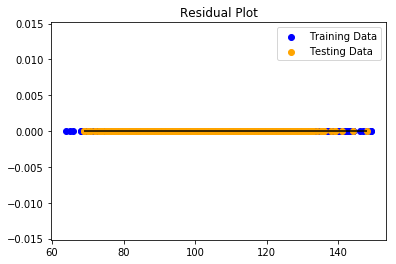

In [13]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [14]:
df = MLR_nba.corr()
df.iloc[1][(df.iloc[1] > .5)]

TeamPoints         1.000000
FieldGoals         0.836203
FieldGoalsPct      0.710187
X3PointShots       0.518022
Assists            0.574607
X2PointShotsPct    0.561949
eFG%               0.746072
Name: TeamPoints, dtype: float64

In [15]:
cf_dict = {}
for i in range(len(X.columns)):
    cf_dict[X.columns[i]] = coefficients[i]
    

In [35]:
cf_dict

with open('dict.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in cf_dict.items():
       writer.writerow([key, value])

In [17]:
Player_data = pd.read_csv('static/data/player_game_data.csv')
Player_data.Player = Player_data.Player.str.split('\\',expand=True)[0]

In [18]:
Player_data.Tm.unique()

array(['OKC', 'MIA', 'SAS', 'NOP', 'MEM', 'BRK', 'NYK', 'ORL', 'HOU',
       'MIL', 'LAL', 'POR', 'TOR', 'CHI', 'TOT', 'SAC', 'PHO', 'CHO',
       'DAL', 'DEN', 'MIN', 'WAS', 'ATL', 'GSW', 'LAC', 'IND', 'UTA',
       'PHI', 'CLE', 'DET', 'BOS'], dtype=object)

In [19]:
user_team1 = input()

LAL


In [20]:
Player_data[Player_data.Tm == user_team1].Player

12         Kostas Antetokounmpo
70                Avery Bradley
98     Kentavious Caldwell-Pope
108                 Alex Caruso
135                  Quinn Cook
151                Troy Daniels
153               Anthony Davis
177                Jared Dudley
230                 Danny Green
284         Talen Horton-Tucker
286               Dwight Howard
307                LeBron James
345                  Kyle Kuzma
391                JaVale McGee
423             Markieff Morris
443                Zach Norvell
506                 Rajon Rondo
Name: Player, dtype: object

In [21]:
user_player11 = input()
user_player12 = input()
user_player13 = input()
user_player14 = input()
user_player15 = input()

LeBron James
Lebron James
Lebron James
Lebron James
Lebron James


In [22]:
user_team2 = input()

LAC


In [23]:
Player_data[Player_data.Tm == user_team2].Player

52      Patrick Beverley
130          Amir Coffey
216          Paul George
232       JaMychal Green
247     Maurice Harkless
250     Montrezl Harrell
305       Reggie Jackson
326    Mfiondu Kabengele
359        Kawhi Leonard
376         Terance Mann
392      Rodney McGruder
420        Marcus Morris
425     Johnathan Motley
469    Patrick Patterson
501      Jerome Robinson
524        Landry Shamet
586       Derrick Walton
607         Lou Williams
623          Ivica Zubac
Name: Player, dtype: object

In [24]:
user_player21 = input()
user_player22 = input()
user_player23 = input()
user_player24 = input()
user_player25 = input()

Kawhi Leonard
Kawhi Leonard
Kawhi Leonard
Kawhi Leonard
Kawhi Leonard


In [25]:
home_team = Player_data[Player_data.Player.isin([user_player11,user_player12,user_player13,user_player14,user_player15])]
home_minutes = home_team.MP

In [26]:
home_team.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [27]:
home_team.drop(columns = ['PTS', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP','FG%', 'eFG%', 'FT%', '3P%', '2P%'], inplace=True)

/Users/jacksalva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
home_team_norm = home_team.apply(lambda x: x/home_minutes)*48

In [29]:
away_team = {}

away_team[player21] = Player_data[Player_data.Player == player21]



away_team = Player_data[Player_data.Player.isin([user_player21,user_player22,user_player23,user_player24,user_player25])]
away_minutes = away_team.MP

In [30]:
away_team.drop(columns = ['PTS', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP','FG%', 'eFG%', 'FT%', '3P%', '2P%'], inplace=True)

In [31]:
away_team_norm = away_team.apply(lambda x: x/away_minutes)*48

In [33]:
away_team

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
359,9.3,19.9,2.1,5.7,7.2,14.2,6.1,6.9,1.0,6.3,7.3,5.0,1.8,0.6,2.7,1.9
